In [6]:
import sys
sys.path.append('../../code/')

from pathlib import Path

from convml_tt.architectures.triplet_trainer import NPMultiImageItemList, loss_func, monkey_patch_fastai
import fastai.vision

In [7]:
monkey_patch_fastai()

In [16]:
path = Path('../../data/storage/tiles/goes16/')

tile_path = path/"Nx256_s200000.0_N500study_N2000train/train"
models_path = path/"models"
#models_path.mkdir(exist_ok=True, parents=True)

In [19]:
item_list = NPMultiImageItemList.from_folder(path=tile_path, extensions=['.png',], )
item_list = item_list.filter_by_rand(p=0.3)
len(item_list)

613

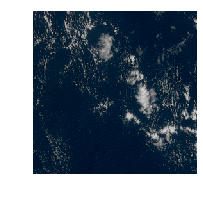

In [20]:
item_list.get(2)[2].show()

In [7]:
src  = (item_list       
        .random_split_by_pct()
        .label_empty()
       )

data = (src
        .transform(fastai.vision.get_transforms(flip_vert=True,))
        .databunch(bs=50)
        .normalize(fastai.vision.imagenet_stats)
       )

In [9]:
learn = fastai.vision.create_cnn(data=data, arch=fastai.vision.models.resnet18, loss_func=loss_func)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-02


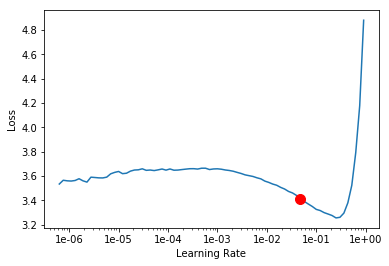

In [11]:
learn.lr_find()

learn.recorder.plot()

In [12]:
learn.fit_one_cycle(cyc_len=10, max_lr=4.0e-2)

epoch,train_loss,valid_loss
1,2.993530,1.766827
2,2.127844,0.961670
3,1.570781,0.875923
4,1.476031,0.973799
5,1.407834,0.952390
6,1.283128,0.740203
7,1.115534,0.639688
8,0.940347,0.556594
9,0.792596,0.521508
10,0.701764,0.521728


In [13]:
learn.export(models_path/"GOES-R_satpy_comp_3k.pkl")

In [14]:
learn.fit_one_cycle(cyc_len=10, max_lr=1.0e-2)

epoch,train_loss,valid_loss
1,0.615635,0.500874
2,0.622584,0.536250
3,0.659656,0.615578
4,0.684394,0.540090
5,0.687873,0.626413
6,0.673036,0.509659
7,0.634780,0.509401
8,0.602233,0.471101
9,0.571844,0.472169
10,0.548837,0.471928


In [16]:
learn.export(models_path/"GOES-R_satpy_comp_3k__train2.pkl")

In [17]:
learn.fit_one_cycle(cyc_len=10, max_lr=1.0e-3)

epoch,train_loss,valid_loss
1,0.537785,0.470110
2,0.534385,0.470261
3,0.528403,0.465505
4,0.526632,0.466017
5,0.527756,0.468128
6,0.525980,0.470623
7,0.526426,0.465155
8,0.518310,0.461972
9,0.511393,0.462035
10,0.511548,0.462755


In [18]:
learn.export(models_path/"GOES-R_satpy_comp_3k__train3.pkl")